In [1]:
from gflownet.algo.config import TBVariant
from gflownet.config import Config,init_empty
import torch
import gc
from hyperparams_base_model import ScentTrainer

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.



############################################################
#                     Initialize MCFs                      #
############################################################

Filter                                        Min        Max
------------------------------------------------------------
LogP                                         0.06       4.91
Molecular Weight                           100.12     282.46
HBAB + HBD                                   0.00       5.00
TPSA                                         0.00      63.32
Rotatable Bonds                              0.00      11.00
NO2 Groups                                   0.00       0.00
Heteroatoms                                  0.00       4.00
Aromatic Rings                               0.00       1.00
Atom Count                                   0.00      20.00
Triple Bonds                                 0.00       0.00
Oxygen Chain Length                          0.00       1.00

#####################

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
best_params={
    'algo_variant': 1, 
    'algo_sampling_tau': 0.9586388653961274, 
    'algo_Z_learning_rate': 0.0009172472645240433, 
    'opt_learning_rate': 0.00033456094523569453, 
    'opt_momentum': 0.651294024078677, 
    'opt_clip_grad_param': 9.906781758764712, 
    'opt_weight_decay': 3.9731330248837407e-07
    }

In [ ]:
# Initialize default hyperprameters
config = init_empty(Config())

# For CPU
config.device = torch.device('cpu')
config.num_workers = 0
config.log_dir ="./logs/hyperbest loong"
config.overwrite_existing_exp=True

config.validate_every=1000
config.algo.num_from_policy = 32
config.algo.num_from_dataset = 32
config.algo.valid_num_from_policy= 0
config.algo.valid_num_from_dataset= 64
config.num_training_steps = 3000 #10_000
config.print_every =1


config.algo.tb.do_parameterize_p_b = False # Dont know how to load the model with this parameter = True
config.num_validation_gen_steps = 1
config.overwrite_existing_exp=True
config.algo.tb.mask_invalid_rewards = False
config.algo.tb.std_cut_losses = False
config.algo.tb.std_cut_scale = 1


# OPTUNA PARAMETERS
# Algo
config.algo.tb.variant = best_params["algo_variant"]
config.algo.sampling_tau = best_params["algo_sampling_tau"]
config.algo.tb.Z_learning_rate = best_params["algo_Z_learning_rate"]
# Opt
config.opt.clip_grad_param = best_params["opt_clip_grad_param"]
config.opt.momentum = best_params["opt_momentum"]
config.opt.learning_rate = best_params["opt_learning_rate"]
config.opt.weight_decay = best_params["opt_weight_decay"]




gc.collect()
trainer = ScentTrainer(config, print_config=False)


trainer.run(logger=None)
gc.collect()
    
 

22/05/2025 15:28:59 - INFO - logger - Starting training
22/05/2025 15:29:09 - INFO - logger - iteration 1 : offline_loss:5306.87 online_loss:1631.59 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-26.64 invalid_losses:1631.58 backward_vs_unif:0.00 logZ:0.32 loss:3469.23 n_loss:0.00 tb_loss:3469.23 batch_entropy:60.89 traj_lens:13.66 grad_norm:4529.82 grad_norm_clip:9.91 sampled_reward_avg:0.00 train_time:4.51 time_spent:10.03
22/05/2025 15:29:16 - INFO - logger - iteration 2 : offline_loss:739.75 online_loss:1764.28 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-19.64 invalid_losses:1819.34 backward_vs_unif:0.00 logZ:-0.22 loss:1252.02 n_loss:0.00 tb_loss:1252.02 batch_entropy:45.85 traj_lens:12.58 grad_norm:1679.63 grad_norm_clip:9.91 sampled_reward_avg:0.01 train_time:3.73 time_spent:7.59
22/05/2025 15:29:29 - INFO - logger - iteration 3 : offline_loss:3530.95 online_loss:1521.18 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-44.24 invalid_losses

[17:57:46] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[17:57:46] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[17:57:46] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[17:57:46] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 17:57:54 - INFO - logger - iteration 525 : offline_loss:642.93 online_loss:216.53 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-53.84 invalid_losses:282.22 backward_vs_unif:0.00 logZ:-0.88 loss:429.73 n_loss:0.00 tb_loss:429.73 batch_entropy:53.12 traj_lens:17.53 grad_norm:12138.18 grad_norm_clip:9.91 sampled_reward_avg:0.19 train_time:5.56 time_spent:12.19
22/05/2025 17:58:09 - INFO - logger - iteration 526 : offline_loss:299.34 online_loss:173.07 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-75.30 invalid_losses:207.79 backward_vs_unif:0.00 logZ:-0.92 loss:236.21 n_loss:0.00 tb_loss:236.21 batch_entropy:56.47 traj_lens:19.53 grad_norm:5705.93 grad_norm_clip:9.91 sampled_reward_avg:0.16 train_time:6.85 time_spent:14.86
22/05/2025 17:58:23 - INFO - logger - iteration 527 : offline_loss:2704.53 online_loss:199.83 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-60.17 invalid_losses:255.70 backward_vs_unif:0.00 logZ:-0.82 loss:1452.18 n_l

[18:00:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:00:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:00:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:00:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 18:01:00 - INFO - logger - iteration 539 : offline_loss:73.39 online_loss:191.89 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-71.78 invalid_losses:226.91 backward_vs_unif:0.00 logZ:-0.09 loss:132.64 n_loss:0.00 tb_loss:132.64 batch_entropy:53.96 traj_lens:18.52 grad_norm:1914.41 grad_norm_clip:9.91 sampled_reward_avg:0.15 train_time:6.23 time_spent:13.65
22/05/2025 18:01:15 - INFO - logger - iteration 540 : offline_loss:61.27 online_loss:174.58 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-74.33 invalid_losses:217.74 backward_vs_unif:0.00 logZ:-0.41 loss:117.93 n_loss:0.00 tb_loss:117.93 batch_entropy:49.86 traj_lens:18.88 grad_norm:421.41 grad_norm_clip:9.91 sampled_reward_avg:0.16 train_time:6.75 time_spent:14.66
22/05/2025 18:01:27 - INFO - logger - iteration 541 : offline_loss:159.85 online_loss:233.42 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-56.25 invalid_losses:323.71 backward_vs_unif:0.00 logZ:-0.92 loss:196.63 n_loss:0.

[19:45:31] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:45:31] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:45:32] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:45:32] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 19:45:45 - INFO - logger - iteration 981 : offline_loss:107.60 online_loss:161.30 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-94.28 invalid_losses:185.17 backward_vs_unif:0.00 logZ:3.29 loss:134.45 n_loss:0.00 tb_loss:134.45 batch_entropy:62.74 traj_lens:22.67 grad_norm:1576.17 grad_norm_clip:9.91 sampled_reward_avg:0.10 train_time:9.62 time_spent:20.29
22/05/2025 19:46:10 - INFO - logger - iteration 982 : offline_loss:42.55 online_loss:194.64 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-108.35 invalid_losses:200.12 backward_vs_unif:0.00 logZ:3.31 loss:118.59 n_loss:0.00 tb_loss:118.59 batch_entropy:71.72 traj_lens:25.33 grad_norm:2215.09 grad_norm_clip:9.91 sampled_reward_avg:0.02 train_time:11.73 time_spent:25.16
22/05/2025 19:46:35 - INFO - logger - iteration 983 : offline_loss:523.51 online_loss:99.66 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-127.56 invalid_losses:108.38 backward_vs_unif:0.00 logZ:2.67 loss:311.59 n_loss:0

[19:50:06] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:50:06] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:50:06] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:50:06] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 19:50:20 - INFO - logger - iteration 992 : offline_loss:75.59 online_loss:259.43 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-141.94 invalid_losses:324.40 backward_vs_unif:0.00 logZ:2.75 loss:167.51 n_loss:0.00 tb_loss:167.51 batch_entropy:79.23 traj_lens:23.91 grad_norm:8039.49 grad_norm_clip:9.91 sampled_reward_avg:0.14 train_time:10.76 time_spent:24.43
22/05/2025 19:50:48 - INFO - logger - iteration 993 : offline_loss:2409.09 online_loss:193.86 reward_loss:0.00 invalid_trajectories:0.91 invalid_logprob:-126.13 invalid_losses:211.30 backward_vs_unif:0.00 logZ:3.05 loss:1301.47 n_loss:0.00 tb_loss:1301.47 batch_entropy:100.79 traj_lens:26.56 grad_norm:10034.48 grad_norm_clip:9.91 sampled_reward_avg:0.06 train_time:12.85 time_spent:27.79
22/05/2025 19:51:18 - INFO - logger - iteration 994 : offline_loss:25.56 online_loss:218.49 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-133.58 invalid_losses:247.09 backward_vs_unif:0.00 logZ:3.38 loss:122.03 n

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


22/05/2025 19:54:27 - INFO - logger - validation - iteration 1000 : offline_loss:839.81 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:5.08 loss:839.81 n_loss:0.00 tb_loss:839.81 batch_entropy:63.37 traj_lens:17.38 eval_time:1.20
22/05/2025 19:54:28 - INFO - logger - validation - iteration 1000 : offline_loss:43.93 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:5.08 loss:43.93 n_loss:0.00 tb_loss:43.93 batch_entropy:37.80 traj_lens:15.28 eval_time:0.83
22/05/2025 19:54:30 - INFO - logger - validation - iteration 1000 : offline_loss:54.45 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:5.08 loss:54.45 n_loss:0.00 tb_loss:54.45 batch_entropy:42.01 traj_lens:16.84 eval_time:0.90
22/05/2025 19:54:32 - INFO - logger - validation - iteration 1000 : offli

[20:36:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[20:36:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[20:36:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[20:36:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 20:36:51 - INFO - logger - iteration 1085 : offline_loss:178.04 online_loss:240.00 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-82.03 invalid_losses:275.91 backward_vs_unif:0.00 logZ:0.15 loss:209.02 n_loss:0.00 tb_loss:209.02 batch_entropy:57.93 traj_lens:20.20 grad_norm:1972.02 grad_norm_clip:9.91 sampled_reward_avg:0.09 train_time:7.43 time_spent:16.16
22/05/2025 20:37:08 - INFO - logger - iteration 1086 : offline_loss:46.55 online_loss:186.62 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-91.25 invalid_losses:257.24 backward_vs_unif:0.00 logZ:-0.11 loss:116.59 n_loss:0.00 tb_loss:116.59 batch_entropy:53.93 traj_lens:19.38 grad_norm:192.98 grad_norm_clip:9.91 sampled_reward_avg:0.24 train_time:6.93 time_spent:16.86
22/05/2025 20:37:24 - INFO - logger - iteration 1087 : offline_loss:36.40 online_loss:257.69 reward_loss:0.00 invalid_trajectories:0.81 invalid_logprob:-81.73 invalid_losses:308.35 backward_vs_unif:0.00 logZ:0.01 loss:147.04 n_loss:0

[21:10:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:10:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:10:24] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:10:24] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 21:10:34 - INFO - logger - iteration 1248 : offline_loss:59.56 online_loss:175.41 reward_loss:0.00 invalid_trajectories:0.50 invalid_logprob:-89.43 invalid_losses:318.20 backward_vs_unif:0.00 logZ:-0.87 loss:117.48 n_loss:0.00 tb_loss:117.48 batch_entropy:48.58 traj_lens:18.80 grad_norm:619.56 grad_norm_clip:9.91 sampled_reward_avg:0.30 train_time:6.94 time_spent:16.99
22/05/2025 21:10:49 - INFO - logger - iteration 1249 : offline_loss:125.62 online_loss:257.29 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-65.98 invalid_losses:433.24 backward_vs_unif:0.00 logZ:-0.17 loss:191.45 n_loss:0.00 tb_loss:191.45 batch_entropy:47.54 traj_lens:17.80 grad_norm:1241.24 grad_norm_clip:9.91 sampled_reward_avg:0.28 train_time:5.97 time_spent:14.39
22/05/2025 21:11:03 - INFO - logger - iteration 1250 : offline_loss:35.81 online_loss:181.84 reward_loss:0.00 invalid_trajectories:0.47 invalid_logprob:-79.57 invalid_losses:356.19 backward_vs_unif:0.00 logZ:0.38 loss:108.83 n_loss:

[22:32:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:32:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:32:11] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:32:11] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 22:32:21 - INFO - logger - iteration 1648 : offline_loss:44.58 online_loss:185.13 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-85.14 invalid_losses:245.16 backward_vs_unif:0.00 logZ:3.91 loss:114.85 n_loss:0.00 tb_loss:114.85 batch_entropy:51.13 traj_lens:19.50 grad_norm:635.80 grad_norm_clip:9.91 sampled_reward_avg:0.20 train_time:7.16 time_spent:16.83
22/05/2025 22:32:37 - INFO - logger - iteration 1649 : offline_loss:168.12 online_loss:202.49 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-79.55 invalid_losses:334.18 backward_vs_unif:0.00 logZ:3.15 loss:185.30 n_loss:0.00 tb_loss:185.30 batch_entropy:52.56 traj_lens:18.91 grad_norm:1246.56 grad_norm_clip:9.91 sampled_reward_avg:0.30 train_time:6.78 time_spent:15.76
22/05/2025 22:32:52 - INFO - logger - iteration 1650 : offline_loss:529.85 online_loss:170.35 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-74.04 invalid_losses:279.42 backward_vs_unif:0.00 logZ:2.56 loss:350.10 n_loss:0

[22:32:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:32:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:32:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:32:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 22:33:07 - INFO - logger - iteration 1651 : offline_loss:30.46 online_loss:167.47 reward_loss:0.00 invalid_trajectories:0.50 invalid_logprob:-86.18 invalid_losses:310.21 backward_vs_unif:0.00 logZ:2.55 loss:98.96 n_loss:0.00 tb_loss:98.96 batch_entropy:46.17 traj_lens:17.92 grad_norm:308.70 grad_norm_clip:9.91 sampled_reward_avg:0.33 train_time:6.02 time_spent:14.70
22/05/2025 22:33:25 - INFO - logger - iteration 1652 : offline_loss:52.45 online_loss:134.25 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-104.22 invalid_losses:218.24 backward_vs_unif:0.00 logZ:3.10 loss:93.35 n_loss:0.00 tb_loss:93.35 batch_entropy:57.12 traj_lens:20.41 grad_norm:519.57 grad_norm_clip:9.91 sampled_reward_avg:0.28 train_time:7.71 time_spent:18.03
22/05/2025 22:33:40 - INFO - logger - iteration 1653 : offline_loss:99.96 online_loss:186.83 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-74.92 invalid_losses:303.97 backward_vs_unif:0.00 logZ:3.79 loss:143.39 n_loss:0.00 tb

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


22/05/2025 23:57:37 - INFO - logger - validation - iteration 2000 : offline_loss:775.32 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:3.58 loss:775.32 n_loss:0.00 tb_loss:775.32 batch_entropy:61.78 traj_lens:17.38 eval_time:0.97
22/05/2025 23:57:39 - INFO - logger - validation - iteration 2000 : offline_loss:27.71 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:3.58 loss:27.71 n_loss:0.00 tb_loss:27.71 batch_entropy:35.74 traj_lens:15.28 eval_time:0.98
22/05/2025 23:57:41 - INFO - logger - validation - iteration 2000 : offline_loss:27.30 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:3.58 loss:27.30 n_loss:0.00 tb_loss:27.30 batch_entropy:38.85 traj_lens:16.84 eval_time:0.86
22/05/2025 23:57:43 - INFO - logger - validation - iteration 2000 : offli

[00:02:50] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:02:50] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:02:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:02:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


23/05/2025 00:03:01 - INFO - logger - iteration 2022 : offline_loss:386.99 online_loss:129.58 reward_loss:0.00 invalid_trajectories:0.38 invalid_logprob:-94.57 invalid_losses:326.26 backward_vs_unif:0.00 logZ:5.58 loss:258.28 n_loss:0.00 tb_loss:258.28 batch_entropy:51.90 traj_lens:17.77 grad_norm:2948.84 grad_norm_clip:9.91 sampled_reward_avg:0.40 train_time:5.95 time_spent:14.91
23/05/2025 00:03:13 - INFO - logger - iteration 2023 : offline_loss:296.57 online_loss:217.45 reward_loss:0.00 invalid_trajectories:0.53 invalid_logprob:-57.02 invalid_losses:399.27 backward_vs_unif:0.00 logZ:5.05 loss:257.01 n_loss:0.00 tb_loss:257.01 batch_entropy:45.88 traj_lens:16.31 grad_norm:941.15 grad_norm_clip:9.91 sampled_reward_avg:0.32 train_time:4.87 time_spent:12.10
23/05/2025 00:03:25 - INFO - logger - iteration 2024 : offline_loss:186.39 online_loss:154.02 reward_loss:0.00 invalid_trajectories:0.34 invalid_logprob:-55.14 invalid_losses:403.72 backward_vs_unif:0.00 logZ:4.38 loss:170.21 n_loss:

[01:14:17] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:14:17] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:14:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:14:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


23/05/2025 01:14:37 - INFO - logger - iteration 2316 : offline_loss:3337.40 online_loss:229.40 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-161.02 invalid_losses:304.14 backward_vs_unif:0.00 logZ:6.62 loss:1783.40 n_loss:0.00 tb_loss:1783.40 batch_entropy:116.24 traj_lens:29.72 grad_norm:11970.19 grad_norm_clip:9.91 sampled_reward_avg:0.16 train_time:14.79 time_spent:32.60
23/05/2025 01:15:11 - INFO - logger - iteration 2317 : offline_loss:18.86 online_loss:195.64 reward_loss:0.00 invalid_trajectories:0.94 invalid_logprob:-159.63 invalid_losses:207.44 backward_vs_unif:0.00 logZ:6.66 loss:107.25 n_loss:0.00 tb_loss:107.25 batch_entropy:94.08 traj_lens:31.89 grad_norm:2278.28 grad_norm_clip:9.91 sampled_reward_avg:0.04 train_time:15.96 time_spent:33.63
23/05/2025 01:15:41 - INFO - logger - iteration 2318 : offline_loss:36.46 online_loss:360.28 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-204.39 invalid_losses:474.47 backward_vs_unif:0.00 logZ:6.52 loss:198.3

[01:23:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:23:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:23:49] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:23:49] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


23/05/2025 01:24:03 - INFO - logger - iteration 2336 : offline_loss:17.12 online_loss:103.16 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-143.32 invalid_losses:177.95 backward_vs_unif:0.00 logZ:6.11 loss:60.14 n_loss:0.00 tb_loss:60.14 batch_entropy:64.05 traj_lens:22.70 grad_norm:338.46 grad_norm_clip:9.91 sampled_reward_avg:0.28 train_time:9.90 time_spent:22.46
23/05/2025 01:24:29 - INFO - logger - iteration 2337 : offline_loss:45.91 online_loss:185.33 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-187.99 invalid_losses:277.20 backward_vs_unif:0.00 logZ:6.10 loss:115.62 n_loss:0.00 tb_loss:115.62 batch_entropy:87.65 traj_lens:26.17 grad_norm:5911.02 grad_norm_clip:9.91 sampled_reward_avg:0.22 train_time:12.40 time_spent:26.79
23/05/2025 01:24:49 - INFO - logger - iteration 2338 : offline_loss:232.02 online_loss:196.62 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-110.45 invalid_losses:279.76 backward_vs_unif:0.00 logZ:6.19 loss:214.32 n_loss:

[01:55:15] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:55:15] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:55:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:55:19] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


23/05/2025 01:55:34 - INFO - logger - iteration 2476 : offline_loss:83.12 online_loss:192.15 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-174.50 invalid_losses:300.60 backward_vs_unif:0.00 logZ:6.02 loss:137.63 n_loss:0.00 tb_loss:137.63 batch_entropy:77.91 traj_lens:24.00 grad_norm:6777.33 grad_norm_clip:9.91 sampled_reward_avg:0.25 train_time:10.18 time_spent:24.04
23/05/2025 01:55:59 - INFO - logger - iteration 2477 : offline_loss:2948.86 online_loss:169.45 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-129.76 invalid_losses:265.94 backward_vs_unif:0.00 logZ:6.16 loss:1559.15 n_loss:0.00 tb_loss:1559.15 batch_entropy:91.06 traj_lens:24.67 grad_norm:17351.17 grad_norm_clip:9.91 sampled_reward_avg:0.25 train_time:11.30 time_spent:25.21
23/05/2025 01:56:22 - INFO - logger - iteration 2478 : offline_loss:22.42 online_loss:245.38 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-107.37 invalid_losses:334.76 backward_vs_unif:0.00 logZ:6.27 loss:133.90

[03:35:08] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 16


23/05/2025 03:35:18 - INFO - logger - iteration 2895 : offline_loss:112.90 online_loss:125.83 reward_loss:0.00 invalid_trajectories:0.31 invalid_logprob:-60.94 invalid_losses:389.72 backward_vs_unif:0.00 logZ:9.79 loss:119.36 n_loss:0.00 tb_loss:119.36 batch_entropy:43.24 traj_lens:16.69 grad_norm:1040.65 grad_norm_clip:9.91 sampled_reward_avg:0.43 train_time:5.28 time_spent:13.23
23/05/2025 03:35:30 - INFO - logger - iteration 2896 : offline_loss:56.77 online_loss:167.76 reward_loss:0.00 invalid_trajectories:0.41 invalid_logprob:-60.28 invalid_losses:399.72 backward_vs_unif:0.00 logZ:10.36 loss:112.26 n_loss:0.00 tb_loss:112.26 batch_entropy:41.75 traj_lens:16.38 grad_norm:450.24 grad_norm_clip:9.91 sampled_reward_avg:0.41 train_time:4.92 time_spent:12.38
23/05/2025 03:35:43 - INFO - logger - iteration 2897 : offline_loss:11.20 online_loss:113.83 reward_loss:0.00 invalid_trajectories:0.34 invalid_logprob:-77.46 invalid_losses:308.97 backward_vs_unif:0.00 logZ:10.67 loss:62.52 n_loss:0

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


23/05/2025 04:08:29 - INFO - logger - validation - iteration 3000 : offline_loss:723.76 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:723.76 n_loss:0.00 tb_loss:723.76 batch_entropy:61.18 traj_lens:17.38 eval_time:1.13
23/05/2025 04:08:31 - INFO - logger - validation - iteration 3000 : offline_loss:18.80 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:18.80 n_loss:0.00 tb_loss:18.80 batch_entropy:35.21 traj_lens:15.28 eval_time:0.87
23/05/2025 04:08:33 - INFO - logger - validation - iteration 3000 : offline_loss:18.03 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:18.03 n_loss:0.00 tb_loss:18.03 batch_entropy:37.90 traj_lens:16.84 eval_time:1.15
23/05/2025 04:08:35 - INFO - logger - validation - iteration 3000 : offli

115409

In [34]:
test_df = trainer.test_data.df.iloc[trainer.test_data.idcs]
len(test_df)

479

In [38]:
len(trainer.training_data)
batch_idx = 3000 % max(len(trainer.training_data),1)
batch_idx

3000

In [35]:
valid_dl = trainer.build_validation_data_loader()

In [39]:
for batch in valid_dl:
    info = trainer.evaluate_batch(batch.to(trainer.device), 3000, batch_idx)
    #print(info, 3000, "valid")
    #self.log(info, it, "valid")
    print(f"validation - iteration {3000} : " + " ".join(f"{k}:{v:.2f}" for k, v in info.items()))



validation - iteration 3000 : offline_loss:63.76 online_loss:171.54 reward_loss:0.00 invalid_trajectories:0.31 invalid_logprob:-35.48 invalid_losses:516.84 backward_vs_unif:0.00 logZ:6.19 loss:117.65 n_loss:0.00 tb_loss:117.65 batch_entropy:36.32 traj_lens:16.14 sampled_reward_avg:0.44 eval_time:1.78


c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


validation - iteration 3000 : offline_loss:727.39 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:727.39 n_loss:0.00 tb_loss:727.39 batch_entropy:61.00 traj_lens:17.38 eval_time:1.12
validation - iteration 3000 : offline_loss:17.91 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:17.91 n_loss:0.00 tb_loss:17.91 batch_entropy:35.02 traj_lens:15.28 eval_time:1.03
validation - iteration 3000 : offline_loss:18.26 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:18.26 n_loss:0.00 tb_loss:18.26 batch_entropy:38.30 traj_lens:16.84 eval_time:1.25
validation - iteration 3000 : offline_loss:16.85 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:

In [40]:
import copy

In [49]:
gc.collect()

4685

In [207]:
config2 = copy.deepcopy(config)
config2.algo.valid_num_from_policy= 0
config2.algo.valid_num_from_dataset= 1
config.log_dir ="./logs/hyperbest loong trainer2 c"
trainer2 = ScentTrainer(config2, print_config=False)
trainer2.model = copy.deepcopy(trainer.model)
trainer2.sampling_model = copy.deepcopy(trainer.model)
trainer2.training_data = copy.deepcopy(trainer.training_data)
trainer2.test_data = copy.deepcopy(trainer.test_data)

In [208]:
n_drawn = trainer2.cfg.algo.valid_num_from_policy
n_from_dataset = trainer2.cfg.algo.valid_num_from_dataset
n_drawn,n_from_dataset

(0, 1)

In [220]:
from torch_scatter import scatter
import pandas as pd

In [222]:
valid_dl = trainer2.build_validation_data_loader()
df = trainer2.test_data.df.iloc[trainer2.test_data.idcs]
#valid_df = pd.DataFrame()
rows = []



for batch, smiles in zip(valid_dl, df["nonStereoSMILES"]):
    info = trainer2.evaluate_batch(batch.to(trainer2.device), 3000, batch_idx)
    #print(info, 3000, "valid")
    #self.log(info, it, "valid")
    batch_idx_ = torch.arange(n_from_dataset, device=trainer2.device).repeat_interleave(batch.traj_lens)
    cond_info = getattr(batch, "cond_info", None)
    batched_cond_info = cond_info[batch_idx_] if cond_info is not None else None
    fwd_cat, per_graph_out = trainer2.model(batch, batched_cond_info)
    log_pF = fwd_cat.log_prob(batch.actions)
    traj_log_p_F = scatter(log_pF, batch_idx_, dim=0, dim_size=n_from_dataset, reduce="sum")
    log_p_B = batch.log_p_B
    traj_log_p_B = scatter(log_p_B, batch_idx_, dim=0, dim_size=n_from_dataset, reduce="sum")
    log_rewards = batch.log_rewards

    row = {
        'SMILES': smiles,
        'traj_p_F': traj_log_p_F.exp().item(),  
        'traj_p_B': traj_log_p_B.exp().item(),
        'reward': log_rewards.exp().item()
    }
    row = { **row, **info}
    rows.append(row)
    
    print(f"validation - SMILES:{smiles:>25} traj_p_F:{traj_log_p_F.exp().item():.5f} traj_p_B:{traj_log_p_B.exp().item():.5f} reward:{log_rewards.exp().item():.2f}" + " ".join(f"{k}:{v:.2f}" for k, v in info.items()))

valid_df = pd.DataFrame(rows)

validation - SMILES:CCCCCC(=O)OCCc1ccccc1 traj_p_F:0.00000 traj_p_B:0.00000 reward:0.79offline_loss:9.43 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:9.43 n_loss:0.00 tb_loss:9.43 batch_entropy:46.74 traj_lens:22.00 eval_time:0.07
validation - SMILES:CC1=CCC(=C(C)C)CC1 traj_p_F:0.00000 traj_p_B:0.00000 reward:0.69offline_loss:9.70 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:9.70 n_loss:0.00 tb_loss:9.70 batch_entropy:30.06 traj_lens:14.00 eval_time:0.03
validation - SMILES:CC1=C(O)C(=O)C(C)C1C traj_p_F:0.00000 traj_p_B:0.00000 reward:0.83offline_loss:15.46 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:6.19 loss:15.46 n_loss:0.00 tb_loss:15.46 batch_entropy:33.98 traj_lens:14.00 eval_time:0.09
validation - SMILES:CCCCCCCCC

In [226]:
df.keys()

Index(['nonStereoSMILES', 'alcoholic', 'aldehydic', 'alliaceous', 'almond',
       'amber', 'animal', 'anisic', 'apple', 'apricot',
       ...
       'vanilla', 'vegetable', 'vetiver', 'violet', 'warm', 'waxy', 'weedy',
       'winey', 'woody', 'shift_reward'],
      dtype='object', length=140)

In [227]:
df[["nonStereoSMILES","shift_reward"]]

,nonStereoSMILES,shift_reward
982,CCCCCC(=O)OCCc1ccccc1,0.789376
508,CC1=CCC(=C(C)C)CC1,0.689498
4108,CC1=C(O)C(=O)C(C)C1C,0.830900
1295,CCCCCCCCCCCC(OC)OC,0.597757
3603,N#CC=Cc1ccccc1,0.904247
...,...,...
1939,CCCCCCCC=CC=CC=O,0.527373
778,C=C(C)C1CCC(C)C(=O)C1,0.752380
1762,CCCC(=O)OCSC,0.536277
3159,CCOC(CC)OCC(C)C,0.668196


In [224]:
valid_df

,SMILES,traj_p_F,traj_p_B,reward,offline_loss,online_loss,reward_loss,invalid_trajectories,invalid_logprob,invalid_losses,backward_vs_unif,logZ,loss,n_loss,tb_loss,batch_entropy,traj_lens,eval_time
0,CCCCCC(=O)OCCc1ccccc1,5.006694e-21,1.225413e-14,0.789376,9.433177,0,0,0,0.0,0.0,0.0,6.188434,9.433177,0.0,9.433177,46.743511,22.0,0.065574
1,CC1=CCC(=C(C)C)CC1,8.849554e-14,4.340275e-07,0.689498,9.701348,0,0,0,0.0,0.0,0.0,6.188434,9.701348,0.0,9.701348,30.055824,14.0,0.033310
2,CC1=C(O)C(=O)C(C)C1C,1.757011e-15,5.555552e-08,0.830900,15.461998,0,0,0,0.0,0.0,0.0,6.188434,15.461998,0.0,15.461998,33.975163,14.0,0.085039
3,CCCCCCCCCCCC(OC)OC,8.957371e-14,9.042257e-06,0.597757,14.457479,0,0,0,0.0,0.0,0.0,6.188434,14.457479,0.0,14.457479,30.043715,17.0,0.076212
4,N#CC=Cc1ccccc1,1.981738e-17,5.651405e-09,0.904247,19.082554,0,0,0,0.0,0.0,0.0,6.188434,19.082554,0.0,19.082554,38.459972,17.0,0.049534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,CCCCCCCC=CC=CC=O,7.319060e-12,1.674489e-07,0.527373,2.456171,0,0,0,0.0,0.0,0.0,6.188434,2.456171,0.0,2.456171,25.640539,17.0,0.066839
475,C=C(C)C1CCC(C)C(=O)C1,1.204769e-14,8.930611e-09,0.752380,6.774285,0,0,0,0.0,0.0,0.0,6.188434,6.774285,0.0,6.774285,32.049904,15.0,0.063035
476,CCCC(=O)OCSC,7.208565e-10,2.572018e-04,0.536277,5.588537,0,0,0,0.0,0.0,0.0,6.188434,5.588537,0.0,5.588537,21.050581,11.0,0.043355
477,CCOC(CC)OCC(C)C,6.079765e-11,1.205633e-05,0.668196,5.353524,0,0,0,0.0,0.0,0.0,6.188434,5.353524,0.0,5.353524,23.523470,12.0,0.039582


In [228]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'traj pF')

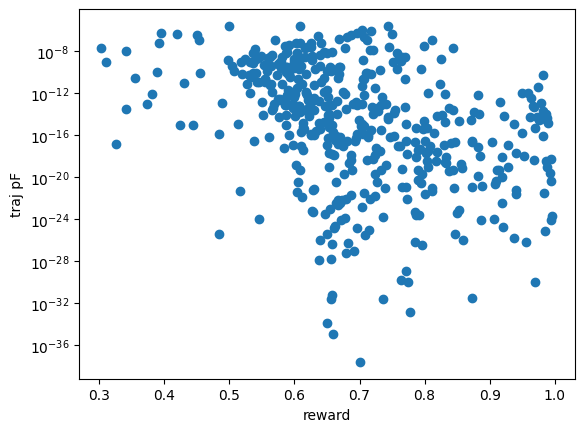

In [234]:
plt.scatter(valid_df["reward"],valid_df["traj_p_F"] )
plt.yscale("log")
plt.xlabel("reward")
plt.ylabel("traj pF")

Text(0.5, 0, 'reward')

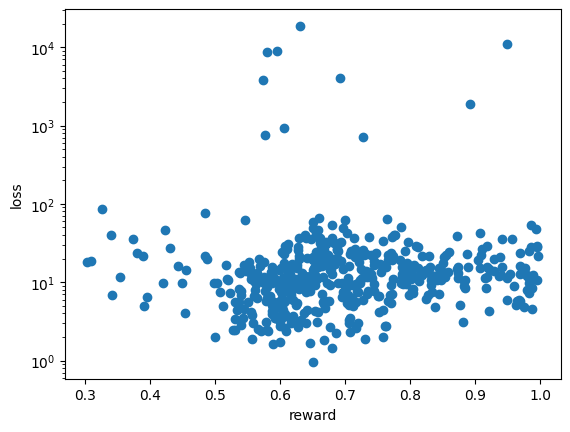

In [235]:
plt.scatter(valid_df["reward"],valid_df["loss"] )
plt.yscale("log")
plt.ylabel("loss")
plt.xlabel("reward")

Text(0.5, 0, 'traj_lens')

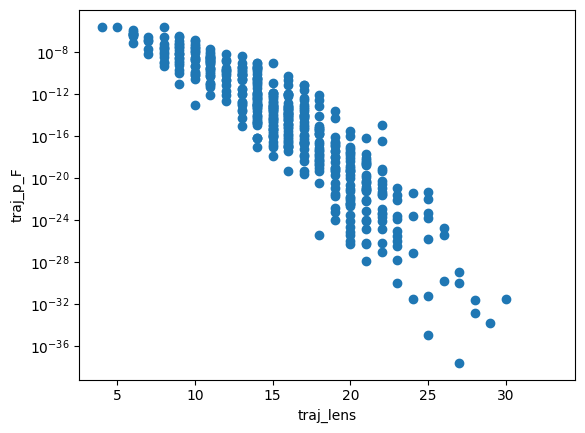

In [244]:
plt.scatter(valid_df["traj_lens"],valid_df["traj_p_F"] )
plt.yscale("log")
plt.ylabel("traj_p_F")
plt.xlabel("traj_lens")

Text(0.5, 0, 'traj_lens')

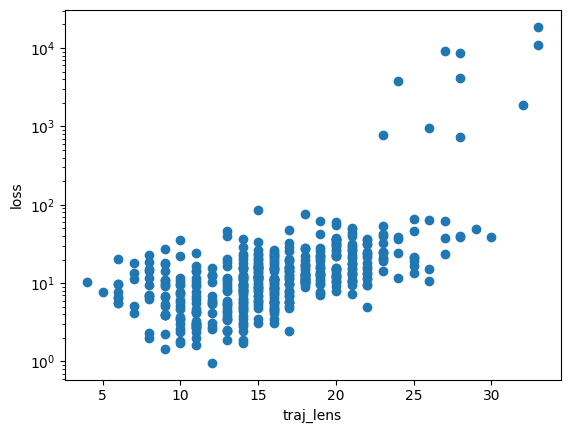

In [245]:
plt.scatter(valid_df["traj_lens"],valid_df["loss"] )
plt.yscale("log")
plt.ylabel("loss")
plt.xlabel("traj_lens")

In [241]:
valid_df["loss"].max()
valid_df["loss"].min()

0.962854266166687

In [242]:
valid_df["loss"].mean()

138.6155299739698

In [243]:
valid_df["loss"].median()

11.496161460876465

Text(0.5, 0, 'traj_lens')

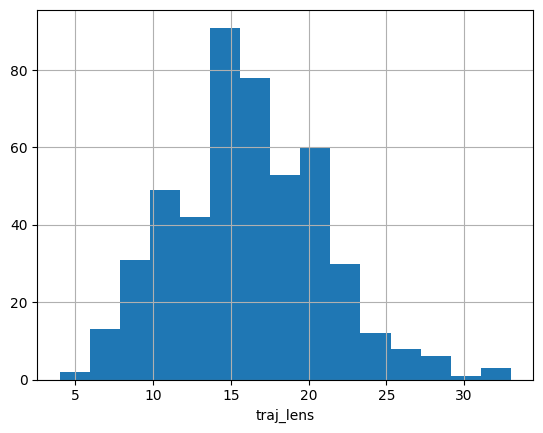

In [251]:
valid_df["traj_lens"].hist(bins=15)
plt.xlabel("traj_lens")

In [ ]:
from torch_geometric.data import Batch


ImportError: cannot import name 'to_data_list' from 'torch_geometric.utils' (c:\Users\paulj\Desktop\Master\venv\lib\site-packages\torch_geometric\utils\__init__.py)

In [183]:
def Data_to_graph( data) -> Graph:
    import networkx as nx
    
    g = nx.Graph()
    
    # Reconstruct nodes
    num_nodes = data.x.size(0)
    for i in range(num_nodes):
        node_attr = {}
        
        # For each attribute k, get slice and decode one-hot index
        for k, sl in zip(trainer2.ctx.atom_attrs, trainer2.ctx.atom_attr_slice):
            # slice boundaries
            start = sl
            end = sl + len(trainer2.ctx.atom_attr_values[k])
            
            one_hot = data.x[i, start:end].cpu().numpy()
            idx = int(one_hot.argmax())
            val = trainer2.ctx.atom_attr_values[k][idx]
            if val != 0:  # assuming 0 is default or null
                node_attr[k] = val
        
        g.add_node(i, **node_attr)
    
    # Reconstruct edges
    edge_index = data.edge_index.cpu().numpy()
    edge_attr = data.edge_attr.cpu().numpy()
    num_edges = edge_index.shape[1] // 2  # edges are duplicated (u,v) and (v,u)
    
    for i in range(num_edges):
        u = edge_index[0, 2*i]
        v = edge_index[1, 2*i]
        edge_attr_i = edge_attr[2*i]  # only need one direction
        
        edge_attr_dict = {}
        for k, sl in zip(trainer2.ctx.bond_attrs, trainer2.ctx.bond_attr_slice):
            start = sl
            end = sl + len(trainer2.ctx.bond_attr_values[k])
            
            one_hot = edge_attr_i[start:end]
            idx = int(one_hot.argmax())
            val = trainer2.ctx.bond_attr_values[k][idx]
            if val != 0:
                edge_attr_dict[k] = val
        
        g.add_edge(u, v, **edge_attr_dict)
    
    return g


In [188]:
gra  =nx.convert_node_labels_to_integers(Data_to_graph(batch))

In [198]:
len(trainer2.test_data.idcs)//64

7

In [201]:
max(trainer2.test_data.idcs)

4777

In [210]:
trainer2.test_data.df.iloc[trainer2.test_data.idcs].keys()

Index(['nonStereoSMILES', 'alcoholic', 'aldehydic', 'alliaceous', 'almond',
       'amber', 'animal', 'anisic', 'apple', 'apricot',
       ...
       'vanilla', 'vegetable', 'vetiver', 'violet', 'warm', 'waxy', 'weedy',
       'winey', 'woody', 'shift_reward'],
      dtype='object', length=140)


KeyboardInterrupt



In [ ]:
valid_dl.__iter__ =

In [215]:
for batch in valid_dl:
    print(batch.log_rewards)
    break


tensor([-0.2365])


In [145]:
from gflownet.envs.graph_building_env import Graph
def data_to_graph(data):
    import torch
    import numpy as np

    g = Graph()

    # Add nodes with attributes
    for i, x in enumerate(data.x):
        x = x.cpu().numpy()
        # Assuming node attribute 'v' is one-hot and you want the index
        if x.sum() == 0:
            v = -1  # or some default value
        else:
            v = int(np.argmax(x))  # Replace this logic if needed
        g.add_node(i, v=v)

    # Add edges with attributes
    edge_index = data.edge_index.cpu().numpy()
    edge_attr = data.edge_attr.cpu().numpy() if data.edge_attr is not None else None

    for i in range(edge_index.shape[1]):
        u, v = edge_index[:, i]
        if edge_attr is not None:
            g.add_edge(u, v, **{"attr": edge_attr[i].tolist()})
        else:
            g.add_edge(u, v)

    return g

In [146]:
gr=[]
for g in graphs:
    gr.append(data_to_graph(g))

gr

In [155]:
atom_type_list = trainer2.ctx.atom_attr_values["v"]

In [173]:
batch.x[5]

tensor([1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [158]:
fixed_graphs = []
for data in graphs:
    g = Graph()
    # Rebuild nodes
    max_type_id = data.x.argmax(dim=1).max().item()
    print(f"Max type_id: {max_type_id}, atom_type_list length: {len(atom_type_list)}")
    for i, type_id in enumerate(data.x.argmax(dim=1).tolist()):
        atom_type = atom_type_list[type_id]
        g.add_node(i, v=atom_type)
    # Rebuild edges
    edge_index = data.edge_index
    for j in range(edge_index.size(1)):
        src, dst = edge_index[0, j].item(), edge_index[1, j].item()
        bond_type = data.edge_attr[j].argmax().item() if data.edge_attr is not None else 1  # default: single
        g.add_edge(src, dst, type=bond_type)
    fixed_graphs.append(g)

Max type_id: 28, atom_type_list length: 10


IndexError: list index out of range

In [147]:
gr

[<[0], [], [28]>,
 <[0], [], [0]>,
 <[0, 1], [(0, 1)], [0, 0]>,
 <[0, 1, 2], [(0, 1), (1, 2)], [0, 0, 0]>,
 <[0, 1, 2, 3], [(0, 1), (0, 3), (1, 2)], [0, 0, 0, 0]>,
 <[0, 1, 2, 3, 4], [(0, 1), (0, 3), (1, 2), (2, 4)], [0, 0, 0, 0, 0]>,
 <[0, 1, 2, 3, 4, 5], [(0, 1), (0, 3), (1, 2), (2, 4), (3, 5)], [0, 0, 0, 0, 0, 0]>,
 <[0, 1, 2, 3, 4, 5], [(0, 1), (0, 3), (1, 2), (2, 4), (3, 5), (4, 5)], [0, 0, 0, 0, 0, 0]>,
 <[0, 1, 2, 3, 4, 5, 6], [(0, 1), (0, 3), (1, 2), (2, 4), (3, 5), (4, 5), (5, 6)], [0, 0, 0, 0, 0, 0, 0]>,
 <[0, 1, 2, 3, 4, 5, 6], [(0, 1), (0, 3), (1, 2), (2, 4), (3, 5), (4, 5), (5, 6)], [0, 0, 0, 0, 0, 0, 0]>,
 <[0, 1, 2, 3, 4, 5, 6], [(0, 1), (0, 3), (1, 2), (2, 4), (3, 5), (4, 5), (5, 6)], [0, 0, 0, 0, 0, 0, 0]>,
 <[0, 1, 2, 3, 4, 5, 6], [(0, 1), (0, 3), (1, 2), (2, 4), (3, 5), (4, 5), (5, 6)], [0, 0, 0, 0, 0, 0, 0]>,
 <[0, 1, 2, 3, 4, 5, 6, 7], [(0, 1), (0, 3), (1, 2), (2, 4), (3, 5), (4, 5), (5, 6), (6, 7)], [0, 0, 0, 0, 0, 0, 0, 0]>,
 <[0, 1, 2, 3, 4, 5, 6, 7, 8], [(0, 1)

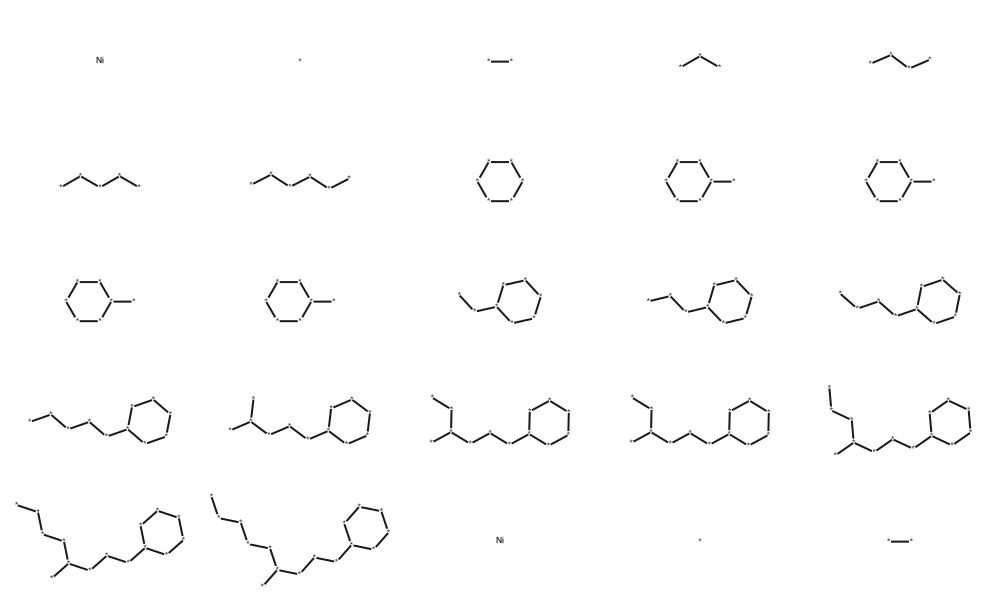

In [154]:
import networkx as nx


os = [trainer2.ctx.graph_to_obj(nx.convert_node_labels_to_integers(i)) for i in gr[:25]]
MolsToGridImage(os, molsPerRow=5, subImgSize=(200, 120))

In [126]:
gr

[]

In [81]:
from gflownet.envs.graph_building_env import GraphAction, GraphActionType

In [102]:
batch.x[3]

tensor([1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [98]:
sum(batch.traj_lens)

tensor(1091)

In [104]:
[trainer2.ctx.action_type_order, trainer2.ctx.bck_action_type_order]

[[<GraphActionType.Stop: 1>,
  <GraphActionType.AddNode: 2>,
  <GraphActionType.SetNodeAttr: 4>,
  <GraphActionType.AddEdge: 3>,
  <GraphActionType.SetEdgeAttr: 5>],
 [<GraphActionType.RemoveNode: 6>,
  <GraphActionType.RemoveNodeAttr: 8>,
  <GraphActionType.RemoveEdge: 7>,
  <GraphActionType.RemoveEdgeAttr: 9>]]

In [106]:
trainer2.ctx.action_type_order[0] is GraphActionType.Stop

True

In [ ]:
def ActionIndex_to_GraphAction(actionlst,trainer_obj):
        """Translate a GraphAction to an index tuple"""

        
        action_type = trainer_obj.ctx.action_type_order[actionlst[0]]

        if action_type is GraphActionType.Stop:
            row = col = 0
            return GraphAction(action_type)
        elif action_type is GraphActionType.AddNode:
            v = trainer_obj.ctx.atom_attr_values["v"][actionlst[2]]
            return GraphAction(action_type, source=int(actionlst[1]), value=v)
        elif action_type is GraphActionType.SetNodeAttr:
            v = trainer_obj.ctx.atom_attr_values["v"][actionlst[2]]
            return GraphAction(action_type, source=actionlst[1])
"""            row = action.source
            # - 1 because the default is index 0
            col = (
                self.atom_attr_values[action.attr].index(action.value) - 1 + self.atom_attr_logit_slice[action.attr][0]
            )
        elif action_type is GraphActionType.AddEdge:
            # Here we have to retrieve the index in non_edge_index of an edge (s,t)
            # that's also possibly in the reverse order (t,s).
            # That's definitely not too efficient, can we do better?
            row = (
                (g.non_edge_index.T == torch.tensor([(action.source, action.target)])).prod(1)
                + (g.non_edge_index.T == torch.tensor([(action.target, action.source)])).prod(1)
            ).argmax()
            col = 0
        elif action_type is GraphActionType.SetEdgeAttr:
            # In order to form an undirected graph for torch_geometric, edges are duplicated, in order (i.e.
            # g.edge_index = [[a,b], [b,a], [c,d], [d,c], ...].T), but edge logits are not. So to go from one
            # to another we can safely divide or multiply by two.
            row = (g.edge_index.T == torch.tensor([(action.source, action.target)])).prod(1).argmax()
            row = row.div(2, rounding_mode="floor")  # type: ignore
            col = (
                self.bond_attr_values[action.attr].index(action.value) - 1 + self.bond_attr_logit_slice[action.attr][0]
            )
        
        return ActionIndex(action_type=type_idx, row_idx=int(row), col_idx=int(col))"""

In [86]:
GraphActionType(1)

<GraphActionType.Stop: 1>

In [ ]:
traj_actions = batch.actions[start : start + length]

In [90]:
batch.traj_lens

tensor([22, 14, 14, 17, 17,  9, 25, 11, 24, 20, 19, 16, 11, 10, 15, 14, 14, 11,
        16, 17, 12, 22,  8, 27, 12, 25, 14, 18, 28, 18, 16, 19, 17, 21, 25, 18,
        15, 25,  9, 13, 22, 12, 16, 21, 16, 17, 15, 15, 16, 19, 19, 16, 20,  7,
        24, 17, 33,  6, 25, 11, 20, 15, 15, 16])

In [92]:
len(batch_idx_)

1091

In [107]:
tiop = {}
for batch in valid_dl:
    stops = 0
    for a in batch.actions:
        if int(a[0]) not in tiop.keys():
            tiop[int(a[0])]=1
        else:
            tiop[int(a[0])]+=1
    

tiop

{1: 5819, 4: 1017, 3: 359, 0: 479, 2: 4}

In [112]:
for batch in valid_dl:
    for a in batch.actions[0:21]:
        
        ac = ActionIndex_to_GraphAction(a,trainer2) #GraphAction(trainer2.ctx.action_type_order[int(a[0])], source=int(a[1]),target=int(a[2]))
        print(ac)
    print(batch.actions[0:21])
    break

<GraphActionType.AddNode, 0, C>
<GraphActionType.AddNode, 0, C>
<GraphActionType.AddNode, 1, C>
<GraphActionType.AddNode, 2, C>
<GraphActionType.AddNode, 0, C>
<GraphActionType.AddNode, 4, C>
<GraphActionType.AddNode, 5, O>
None
<GraphActionType.AddNode, 5, O>
<GraphActionType.AddNode, 7, C>
<GraphActionType.AddNode, 8, C>
<GraphActionType.AddNode, 9, C>
<GraphActionType.AddNode, 10, C>
<GraphActionType.AddNode, 11, C>
<GraphActionType.AddNode, 10, C>
<GraphActionType.AddNode, 13, C>
<GraphActionType.AddNode, 12, C>
None
None
None
None
tensor([[ 1,  0,  1],
        [ 1,  0,  1],
        [ 1,  1,  1],
        [ 1,  2,  1],
        [ 1,  0,  1],
        [ 1,  4,  1],
        [ 1,  5,  7],
        [ 4,  5,  0],
        [ 1,  5,  7],
        [ 1,  7,  1],
        [ 1,  8,  1],
        [ 1,  9,  1],
        [ 1, 10,  1],
        [ 1, 11,  1],
        [ 1, 10,  1],
        [ 1, 13,  1],
        [ 1, 12,  1],
        [ 4, 13,  0],
        [ 4, 10,  0],
        [ 3, 57,  0],
        [ 4, 14,  

In [58]:
def shift_right(x: torch.Tensor, z=0):
    "Shift x right by 1, and put z in the first position"
    x = torch.roll(x, 1, dims=0)
    x[0] = z
    return x

In [60]:
for batch in valid_dl:
    # The position of the last graph of each trajectory
    traj_cumlen = torch.cumsum(batch.traj_lens, 0)
    final_graph_idx = traj_cumlen - 1
    # The position of the first graph of each trajectory
    first_graph_idx = shift_right(traj_cumlen)
    final_graph_idx_1 = torch.maximum(final_graph_idx - 1, first_graph_idx)
    print(first_graph_idx,final_graph_idx)
    break

tensor([   0,   22,   36,   50,   67,   84,   93,  118,  129,  153,  173,  192,
         208,  219,  229,  244,  258,  272,  283,  299,  316,  328,  350,  358,
         385,  397,  422,  436,  454,  482,  500,  516,  535,  552,  573,  598,
         616,  631,  656,  665,  678,  700,  712,  728,  749,  765,  782,  797,
         812,  828,  847,  866,  882,  902,  909,  933,  950,  983,  989, 1014,
        1025, 1045, 1060, 1075]) tensor([  21,   35,   49,   66,   83,   92,  117,  128,  152,  172,  191,  207,
         218,  228,  243,  257,  271,  282,  298,  315,  327,  349,  357,  384,
         396,  421,  435,  453,  481,  499,  515,  534,  551,  572,  597,  615,
         630,  655,  664,  677,  699,  711,  727,  748,  764,  781,  796,  811,
         827,  846,  865,  881,  901,  908,  932,  949,  982,  988, 1013, 1024,
        1044, 1059, 1074, 1090])


In [66]:
for batch in valid_dl:
    batch_idx_ = torch.arange(64, device=trainer2.device).repeat_interleave(batch.traj_lens)
    cond_info = getattr(batch, "cond_info", None)
    batched_cond_info = cond_info[batch_idx_] if cond_info is not None else None
    fwd_cat, per_graph_out = trainer2.model(batch, batched_cond_info)
    log_pF = fwd_cat.log_prob(batch.actions)
    break

In [67]:
len(log_pF)

1091

In [69]:
from torch_scatter import scatter

In [71]:
traj_log_p_F = scatter(log_pF, batch_idx_, dim=0, dim_size=64, reduce="sum")
traj_log_p_F

tensor([-47.0035, -28.9219, -35.4144, -29.5470, -34.5903, -17.5678, -62.5925,
        -26.2050, -50.1590, -40.5683, -38.3715, -31.0569, -21.3318, -21.9844,
        -29.3830, -27.1810, -26.6090, -20.2519, -34.8987, -35.7597, -22.2440,
        -44.3706, -20.1046, -68.7340, -17.0925, -66.0251, -27.3011, -34.1499,
            -inf, -31.9343, -25.2030, -54.3423, -35.8077, -47.9626, -49.0213,
        -40.7310, -28.3318, -57.5995, -17.8524, -27.8679, -47.5710, -24.7537,
        -37.6561, -61.7148, -27.6943, -36.4988, -30.0562, -26.4760, -30.8188,
        -43.7551, -43.7797, -26.7680, -36.7782, -19.0720,     -inf, -33.3519,
            -inf, -13.8756, -74.3576, -19.0214, -48.5185, -29.4540, -27.7533,
        -29.9472], grad_fn=<ScatterAddBackward0>)

In [72]:
traj_log_p_F.exp()

tensor([3.8604e-21, 2.7502e-13, 4.1662e-16, 1.4719e-13, 9.4975e-16, 2.3465e-08,
        6.5524e-28, 4.1622e-12, 1.6451e-22, 2.4066e-18, 2.1651e-17, 3.2522e-14,
        5.4416e-10, 2.8334e-10, 1.7344e-13, 1.5683e-12, 2.7788e-12, 1.6022e-09,
        6.9775e-16, 2.9497e-16, 2.1855e-10, 5.3715e-20, 1.8565e-09, 1.4099e-30,
        3.7742e-08, 2.1167e-29, 1.3909e-12, 1.4753e-15, 0.0000e+00, 1.3524e-14,
        1.1336e-11, 2.5087e-24, 2.8114e-16, 1.4794e-21, 5.1326e-22, 2.0453e-18,
        4.9618e-13, 9.6571e-26, 1.7652e-08, 7.8905e-13, 2.1887e-21, 1.7767e-11,
        4.4275e-17, 1.5761e-27, 9.3864e-13, 1.4085e-16, 8.8461e-14, 3.1742e-12,
        4.1264e-14, 9.9402e-20, 9.6989e-20, 2.3703e-12, 1.0652e-16, 5.2137e-09,
        0.0000e+00, 3.2767e-15, 0.0000e+00, 9.4165e-07, 5.0922e-33, 5.4840e-09,
        8.4860e-22, 1.6154e-13, 8.8494e-13, 9.8654e-14],
       grad_fn=<ExpBackward0>)

In [73]:
for batch in valid_dl:
    print(batch.traj_lens)
    break

tensor([22, 14, 14, 17, 17,  9, 25, 11, 24, 20, 19, 16, 11, 10, 15, 14, 14, 11,
        16, 17, 12, 22,  8, 27, 12, 25, 14, 18, 28, 18, 16, 19, 17, 21, 25, 18,
        15, 25,  9, 13, 22, 12, 16, 21, 16, 17, 15, 15, 16, 19, 19, 16, 20,  7,
        24, 17, 33,  6, 25, 11, 20, 15, 15, 16])


In [4]:
import pathlib

In [5]:
def save_run(trial):
    state = {
        "models_state_dict": [trial.model.state_dict()],
        "cfg": trial.cfg,
        "env_ctx": trial.model.env_ctx,
        #"model": trial.model,
    }
    if trial.sampling_model is not trial.model:
        state["sampling_model_state_dict"] = [trial.sampling_model.state_dict()]
    fn = pathlib.Path(trial.cfg.log_dir) / "model_final_save.pt"
    with open(fn, "wb") as fd:
        torch.save(
            state,
            fd,
        )


In [6]:
save_run(trainer)

In [7]:
from rdkit.Chem.Draw import MolsToGridImage, MolToImage

In [9]:
# Generate molecules
trajs = trainer.algo.create_training_data_from_own_samples(trainer.model, 25)
objs = [trainer.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trainer.task.compute_obj_properties(objs)
cond_info = trainer.task.sample_conditional_information(len(obj_props), 1)
log_rewards = trainer.task.cond_info_to_logreward(cond_info, obj_props)


#MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r.exp().item():.2f}' for r in log_rewards[:25]])

In [10]:
rews = []
c = 0
for i in is_valid:
    if i:
        rews.append(round(log_rewards[c].exp().item(),2))
        c += 1
    else:
        rews.append("-")

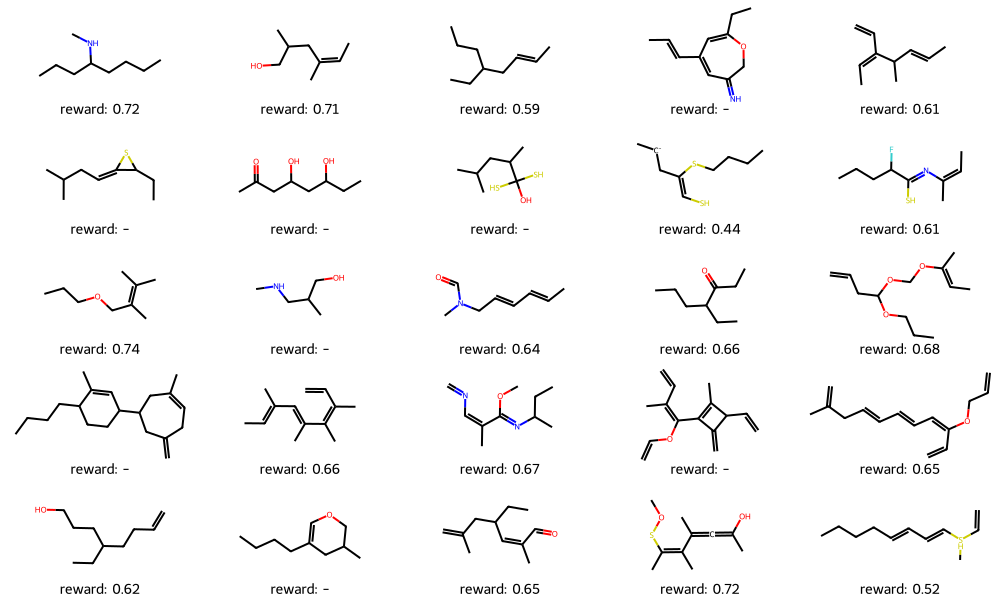

In [15]:
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' for r in rews[:25]])

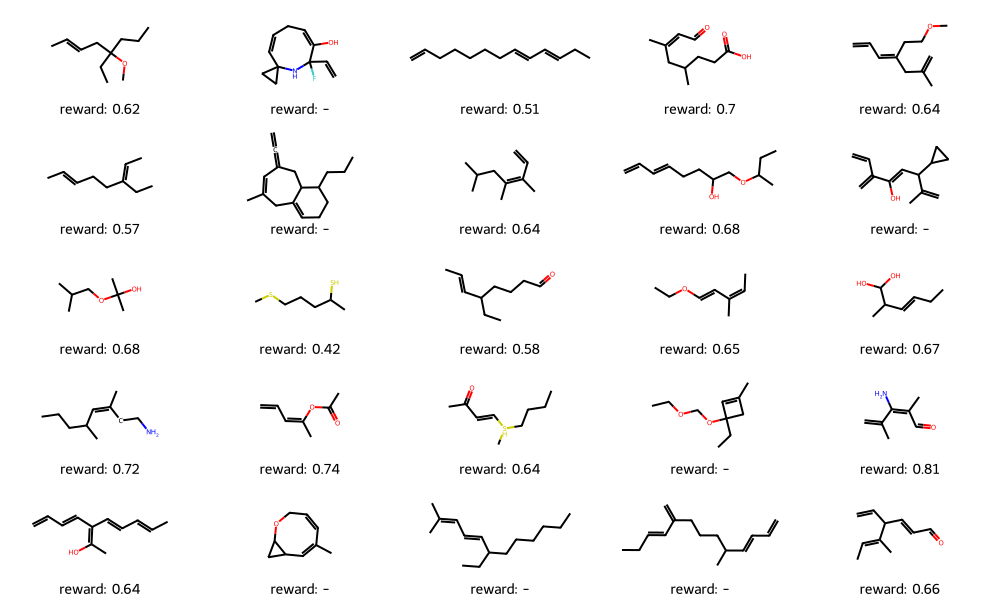

In [16]:
# Generate molecules
trajs = trainer.algo.create_training_data_from_own_samples(trainer.model, 25)
objs = [trainer.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trainer.task.compute_obj_properties(objs)
cond_info = trainer.task.sample_conditional_information(len(obj_props), 1)
log_rewards = trainer.task.cond_info_to_logreward(cond_info, obj_props)

rews = []
c = 0
for i in is_valid:
    if i:
        rews.append(round(log_rewards[c].exp().item(),2))
        c += 1
    else:
        rews.append("-")

MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' for r in rews[:25]])

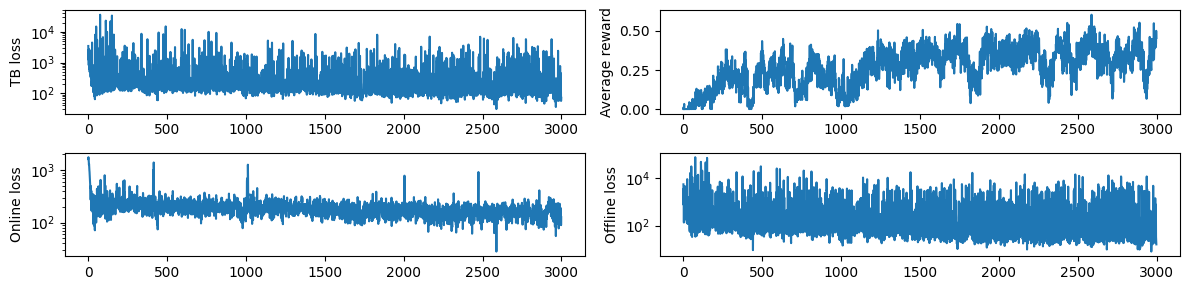

In [12]:
from gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator

cfg.log_dir = config.log_dir
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(2, 2, figsize=(4*3,3))
ax[0,0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('TB loss')
ax[0,1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[0,1].set_ylabel('Average reward')
#ax[0,2].plot([i.value for i in ea.Scalars('train_logZ')])
#ax[0,2].set_ylabel('Predicted logZ')
ax[1,0].plot([i.value for i in ea.Scalars('train_online_loss')])
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('Online loss')
ax[1,1].plot([i.value for i in ea.Scalars('train_offline_loss')])
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Offline loss')
#ax[2,0].plot([i.value for i in ea.Scalars('valid_online_loss')])
#ax[2,0].set_yscale('log')
#ax[2,0].set_ylabel('Validation online loss')
#ax[2,1].plot([i.value for i in ea.Scalars('valid_offline_loss')])
#ax[2,1].set_yscale('log')
#ax[2,1].set_ylabel('Validation offline loss')
pp.tight_layout()

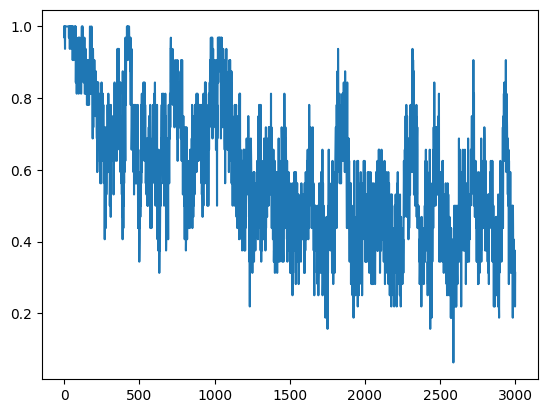

In [13]:
pp.plot([i.value for i in ea.Scalars('train_invalid_trajectories')])

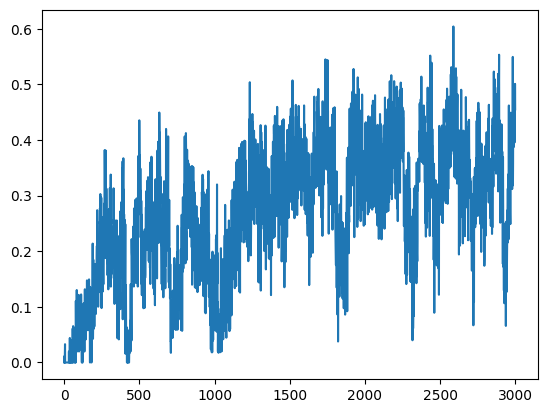

In [14]:
pp.plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])

In [ ]:
dsf

In [17]:
import sqlite3
import pandas as pd
from rdkit.Chem.Draw import MolsToGridImage, MolToImage
import numpy as np
from rdkit import Chem

In [18]:
log_dir = config.log_dir

In [19]:
conn = sqlite3.connect(f"{log_dir}/train/generated_objs_0.db")

In [20]:
df = pd.read_sql_query("SELECT * FROM results", conn)

In [21]:
top_rewards = df.sort_values(by='r', ascending=False).head(25)

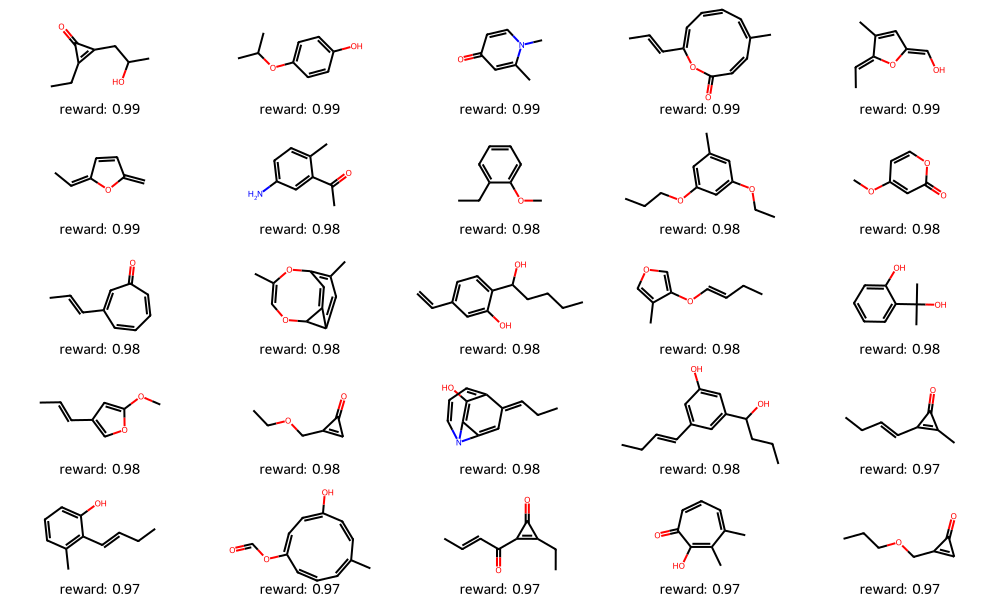

In [22]:
# Generate molecules
objs = [Chem.MolFromSmiles(smiles) for smiles in top_rewards["smi"]]
rewards = top_rewards["r"]


MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards[:25]])

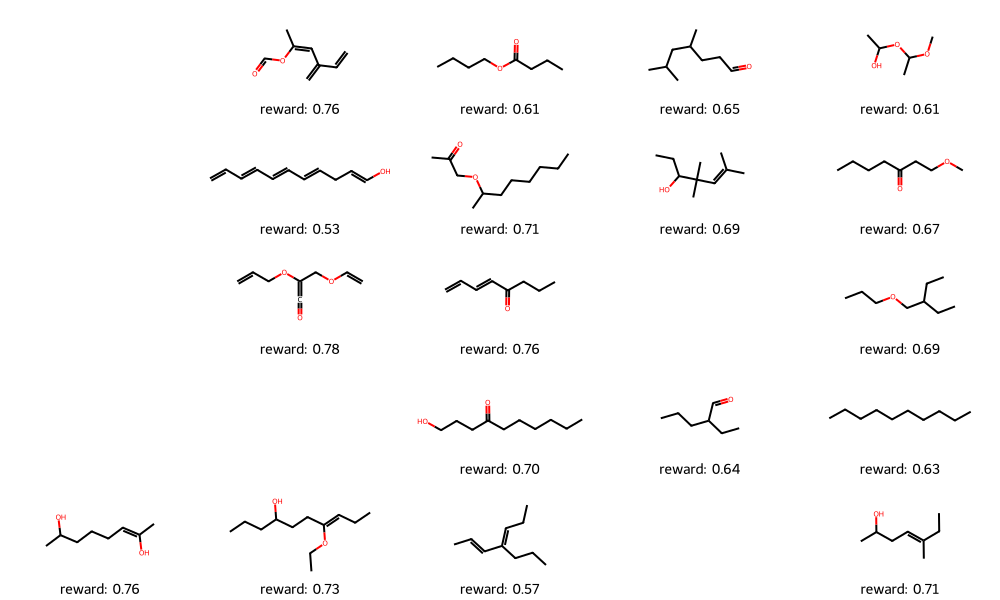

In [23]:
# Generate molecules

objs = [Chem.MolFromSmiles(smiles) for smiles in df[-32:]["smi"]]
rewards = df[-32:]["r"]


MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards[:25]])

In [ ]:
# Utils
import warnings
import os

# Plotting
from rdkit.Chem.Draw import MolsToGridImage
import matplotlib.pyplot as plt
import seaborn as sns

# File management
import json
import numpy as np
import pandas as pd


# GFlowNET
import gflownet
from gflownet.algo.trajectory_balance import TrajectoryBalance
from gflownet.envs.graph_building_env import GraphBuildingEnv
from gflownet.config import init_empty, Config

# OpenPOM
from submodels.openpom.functions import fragance_propabilities_from_smiles_test, fragance_propabilities_from_smiles_train

# Others
from tensorboard.backend.event_processing import event_accumulator
import torch
from rdkit import Chem

In [ ]:
# Model class must be defined somewhere
state = torch.load(os.path.join(log_dir, "model_final_save.pt"), weights_only=False)
#model = statemodel.eval()
#state["models_state_dict"]
config = state["cfg"]
env_ctx = state["env_ctx"]

In [ ]:
model = gflownet.models.graph_transformer.GraphTransformerGFN(state["env_ctx"],state["cfg"])
model.load_state_dict(state["models_state_dict"][0])
model.eval()

In [ ]:
algo = TrajectoryBalance(GraphBuildingEnv(),state["env_ctx"],state["cfg"])

In [ ]:
from gflownet.envs.mol_building_env import MolBuildingEnvContext

In [ ]:
ctx = MolBuildingEnvContext(
            ['Br', 'C', 'Cl', 'F', 'Fe', 'N', 'Na', 'O', 'S'],
            #["C", "N", "F", "O"],
            #charges=[0],  # disable charge
            chiral_types=[Chem.rdchem.ChiralType.CHI_UNSPECIFIED],  # disable chirality
            expl_H_range=[0,1],
            num_cond_dim=1,
            max_nodes=20,
        )

In [ ]:
# Generate molecules
trajs = algo.create_training_data_from_own_samples(model, 25)
objs = [ctx.graph_to_obj(i['result']) for i in trajs]

In [ ]:
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120))